In [2]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px
import pandas as pd
import matplotlib.pyplot as plt
# Read WhatsApp chat file
with open("C:\\Users\\saipr\\OneDrive\\Desktop\\project whatsapp chat analysis\\what.txt", 'r', encoding='utf-8') as file:
    data = file.readlines()

# Remove extra lines from the data
data = [line.strip() for line in data]

# Separate data into different columns
df = pd.DataFrame(data, columns=['message'])
df = df[df['message'].str.contains(': ')]
df[['sender_info', 'message']] = df['message'].str.split(': ', 1, expand=True)
df[['date', 'time']] = df['sender_info'].str.split(' - ', 1, expand=True)
df['sender'] = df['sender_info'].str.split(' - ', 1, expand=True)[1]
df.drop('sender_info', axis=1, inplace=True)

# Save data to a CSV file
df.to_csv('whatsapp_chat_processed.csv', index=False)

In [3]:
df # viewing the data set

,message,date,time,sender
5,<Media omitted>,"6/20/22, 7:27 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
6,Dear students 3-1 supply and 3-2 Regular Exter...,"6/20/22, 8:08 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
7,All the students must attend the classes from ...,"6/21/22, 9:14 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
8,This message was deleted,"6/22/22, 2:11 PM",Rajesh Clg,Rajesh Clg
9,This message was deleted,"6/22/22, 2:11 PM",Rajesh Clg,Rajesh Clg
...,...,...,...,...
5182,538,"4/19/23, 5:29 PM",+91 70973 19722,+91 70973 19722
5183,"503,532,545","4/19/23, 5:30 PM",+91 83286 99417,+91 83286 99417
5184,514,"4/19/23, 5:39 PM",+91 93901 19530,+91 93901 19530
5185,508,"4/19/23, 5:39 PM",Kavitha Cse,Kavitha Cse


In [4]:
df.head(30) # first 30 values of dataset

,message,date,time,sender
5,<Media omitted>,"6/20/22, 7:27 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
6,Dear students 3-1 supply and 3-2 Regular Exter...,"6/20/22, 8:08 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
7,All the students must attend the classes from ...,"6/21/22, 9:14 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
8,This message was deleted,"6/22/22, 2:11 PM",Rajesh Clg,Rajesh Clg
9,This message was deleted,"6/22/22, 2:11 PM",Rajesh Clg,Rajesh Clg
10,<Media omitted>,"6/23/22, 10:29 AM",+91 95533 91013,+91 95533 91013
11,mid 1 internal marks,"6/23/22, 10:29 AM",+91 95533 91013,+91 95533 91013
12,All the students are informed clear all your d...,"6/23/22, 2:43 PM",+91 95533 91013,+91 95533 91013
15,<Media omitted>,"6/24/22, 7:33 AM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
16,Dear Sir/Madam,"6/24/22, 7:37 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr


In [5]:
comment_words=' ' ## removing stop words from message 
stopwords=set(STOPWORDS)
for val in df.message:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)): 
        tokens[i]=tokens[i].lower()
        for words in tokens:
            comment_words=comment_words + words +' '

In [6]:
# forming wordcloud image
wordcloud=WordCloud(width=1000,height=1000,background_color='white',stopwords=stopwords,min_font_size=10).generate(comment_words)

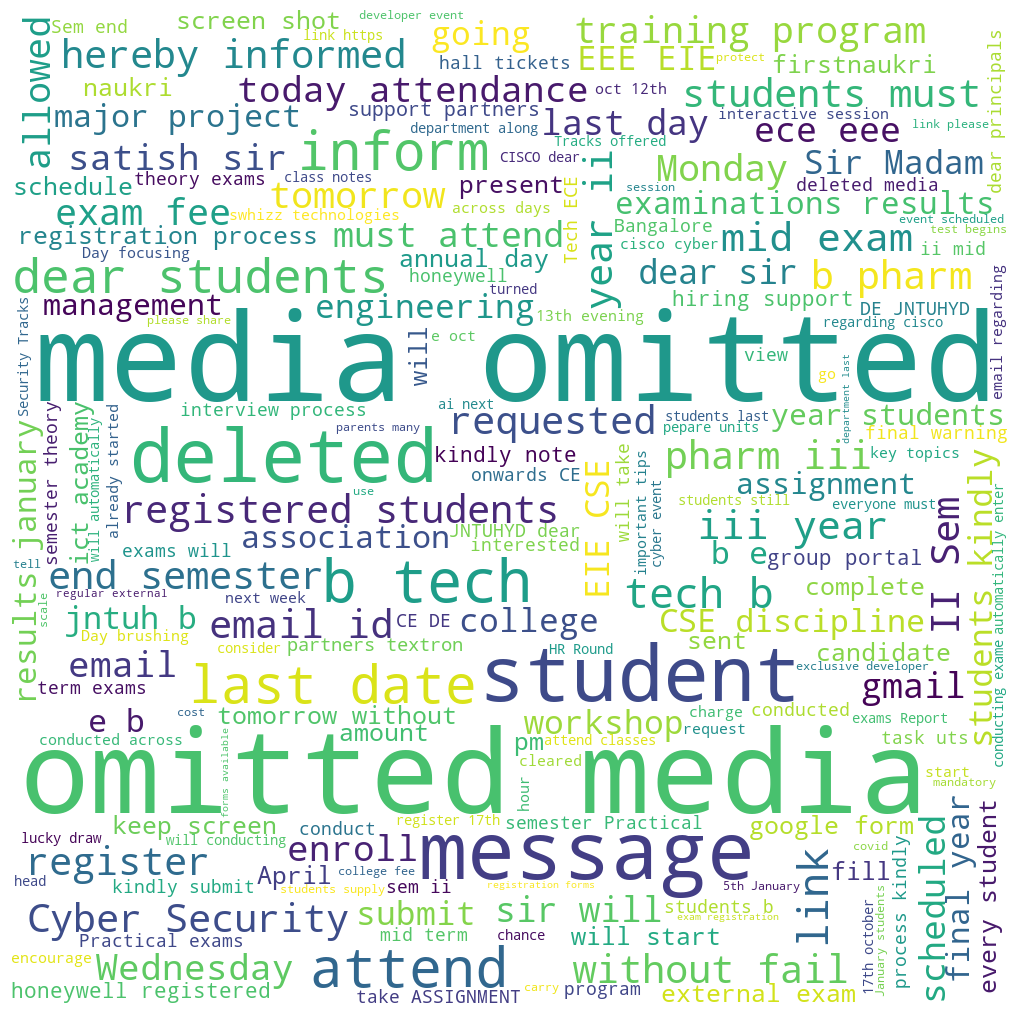

In [7]:
## Displaying the wordcloud image
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
import nltk # importing library to perform sentiment analysis 

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer ##  importing  SentimentIntensityAnalyzer

In [10]:
sentiment=SentimentIntensityAnalyzer() # storing in variable  sentiment

In [11]:
df.describe()

,message,date,time,sender
count,2315,2315,1965,1965
unique,954,1549,112,112
top,<Media omitted>,"7/26/22, 10:58 AM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
freq,989,30,315,315


In [12]:
df.dropna().sum().count() ## checking for null values

4

In [13]:

df.dropna() ## removing null values

,message,date,time,sender
5,<Media omitted>,"6/20/22, 7:27 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
6,Dear students 3-1 supply and 3-2 Regular Exter...,"6/20/22, 8:08 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
7,All the students must attend the classes from ...,"6/21/22, 9:14 PM",Sathish Reddy Sir Knrr,Sathish Reddy Sir Knrr
8,This message was deleted,"6/22/22, 2:11 PM",Rajesh Clg,Rajesh Clg
9,This message was deleted,"6/22/22, 2:11 PM",Rajesh Clg,Rajesh Clg
...,...,...,...,...
5182,538,"4/19/23, 5:29 PM",+91 70973 19722,+91 70973 19722
5183,"503,532,545","4/19/23, 5:30 PM",+91 83286 99417,+91 83286 99417
5184,514,"4/19/23, 5:39 PM",+91 93901 19530,+91 93901 19530
5185,508,"4/19/23, 5:39 PM",Kavitha Cse,Kavitha Cse


In [14]:
data1=pd.DataFrame()
data1["positive"]=[sentiment.polarity_scores(i)["pos"]for i in df["message"]] ## using SentimentIntensityAnalyzer checking polarity scores for data
data1["negative"]=[sentiment.polarity_scores(i)["neg"]for i in df["message"]]
data1["neutral"]=[sentiment.polarity_scores(i)["neu"]for i in df["message"]]


In [15]:
data1 # creating dataframe for polarity scores

,positive,negative,neutral
0,0.000,0.000,1.00
1,0.086,0.034,0.88
2,0.000,0.000,1.00
3,0.000,0.000,1.00
4,0.000,0.000,1.00
...,...,...,...
2310,0.000,0.000,1.00
2311,0.000,0.000,1.00
2312,0.000,0.000,1.00
2313,0.000,0.000,1.00


In [16]:
postive=sum(data1['positive'])
Negative=sum(data1['negative'])
neutral=sum(data1['neutral']) ## sum of polarity scores

In [17]:
if postive<Negative or postive>neutral:
    print("postive")
elif postive<neutral or Negative<neutral:
    print("netural")
else:
    print("negative")

netural
